# **Data Handling**
---

## Introduction

You will apply different data exploration, cleaning, and visualization techniques. It is very important to take some time to understand the data. 


## **About the data** 
---
The data set consists of 116,658 observations and 10 columns. It contains data of fifth-grade students, including their Math final exam grade.

* Student ID: identifies uniquely every student. **Note that no two students have the same ID.** 
* Gender
* School group: **There are only three groups school groups (A, B and C)**
* Effort regulation (effort)
* Family stress-level (stress)
* Help-seeking behavior (feedback)
* Regularity patterns of a student throughout the course (regularity)
* Critical-thinking skills (critical)
* Duration in minutes to solve final Math exam (minutes). **Should be numerical.**
* Final Math exam grade (grade) 


**The data set is available in the folder data**

In [41]:
# Your libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **0 Load the data**
---

In [42]:
### 0.1
# YOUR CODE HERE
df = pd.read_csv("./data/school_performance.csv", index_col=0)

In [43]:
# Let's see how the dataframe looks like
print("length of the dataframe:", len(df))
print("first rows of the dataframe:\n")
df.head()

length of the dataframe: 116658
first rows of the dataframe:



,gender,school_group,effort,stress,feedback,regularity,critical,minutes,grade
student_id,,,,,,,,,
20404.0,male,99,5.997184,7.692678,24.722538,99.000000,2.01733,20.0,99.00
26683.0,female,99,6.017588,8.848776,99.000000,99.000000,99.00000,30.0,3.93
32954.0,99,99,6.070632,6.704850,24.448975,7.218109,99.00000,99,3.67
42595.0,99,99,5.996371,99.000000,99.000000,5.578566,1.02639,21.0,99.00
28603.0,male,99,99.000000,6.780604,99.000000,99.000000,99.00000,99,2.86


In [44]:
# TEST CELL, DONT MODIFY
assert len(df) == 116658

<a id="section1"></a>
## **1 Data Exploration** 
---

As mentioned in class, it is good practice to report the percentage of missing values per feature together with the features' descriptive statistics. 

In order to understand the data better, in this exercise, you should:

1. Create a function that takes as input a DataFrame and returns a DataFrame with meaningful descriptive statistics and the percentage of missing values for numerical and categorical (object type) features. The process of data cleaning requires multiple iterations of data exploration. This function should be helpful for the later data cleaning exercises. 

2. Justify the choice of each descriptive statistic. What does each say about the data? Can you identify some irregularities? 

3. In a single figure, choose an appropriate type of graph for each feature and plot each feature individually.  

4. Explain your observations. How are the features distributed (poisson, exponential, gaussian, etc)? Can you visually identify any outliers?



### 1.1 
Create a function that takes as input a DataFrame and returns meaningful descriptive statistics and the percentage of missing values for numerical and categorical (object type) features.



In [45]:
### 1.1
def get_feature_stats(df):
    """
    Obtains descriptive statistics for all features and percentage of missing 
    values
    
    Parameters
    ----------
    df : DataFrame
         Containing all data

    Returns
    -------
    stats : DataFrame
            Containing the statistics for all features.
                   
    """
    ### BEGIN SOLUTION
    numerical = df.describe(include= ['float64'])
    categorical = df.describe(include= ['object'])
    stats = pd.concat([numerical, categorical])
    #stats = df.describe(include= 'all') # alternative
    
    # Select the desired statistics
    stats = stats.loc[['mean', 'std', '50%', 'unique', 'top', 'freq']]
    percentage = df.isnull().sum(axis = 0)*100 / len(df)
    stats.loc['missing_values'] = np.array(percentage)
    ### END SOLUTION
    return stats

In [46]:
stats = get_feature_stats(df)
stats

,effort,stress,feedback,regularity,critical,grade,gender,school_group,minutes
mean,52.489220,53.286495,57.247058,52.929855,50.165142,51.268639,NaN,NaN,NaN
std,46.510992,45.726888,42.073605,46.095884,48.855643,47.732656,NaN,NaN,NaN
50%,52.548300,57.699956,84.696590,78.691904,53.980298,52.775000,NaN,NaN,NaN
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,8,50
top,NaN,NaN,NaN,NaN,NaN,NaN,99,99,99
freq,NaN,NaN,NaN,NaN,NaN,NaN,58329,58329,58329
missing_values,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [47]:
# TEST CELL, DONT MODIFY


In [48]:
# TEST CELL, DONT MODIFY


### 1.2
Justify the choice of each descriptive statistic. What do they say about the data? Can you identify some irregularities? 

YOUR ANSWER HERE

### 1.3
In a single figure, choose an appropriate type of graph for each feature and plot each feature individually.

In [49]:
### 1.3

def plot_features(df):
    """
    Plots all features individually in the same figure
    
    Parameters
    ----------
    df : DataFrame
         Containing all data
         
    Hint
    ------
    To have multiple plots in a single figure see pyplot.figure

    """    
    df = df.copy()
    
    def plot_features(df, title):
        continuous_cols = list(df._get_numeric_data().columns)
        categorical_cols = list(set(df.columns) - set(continuous_cols))
        fig, axes = plt.subplots(3, 3, figsize=(15,10))
        for i, col in enumerate(df.columns):
            ax = axes[i // 3, i % 3]
            data = df[~df[col].isna()]
            if col in continuous_cols:
                sns.histplot(data=data[col], bins=50, ax=ax) #Filter out nan values in the features
            elif col in categorical_cols:
                sns.countplot(data=data, x=col, ax=ax)
            else:
                print(col)
        fig.suptitle(title)
        fig.tight_layout()
    
    
    plot_features(df,"Raw data")
    plt.show()
    # For plotting purposes, we removed the 99 values from the numerical features 
    # to see the distributions more clearly
    df[(df == 99) | (df == '99')] = np.nan

    plot_features(df, "Data without 99 values")
    return plt
    

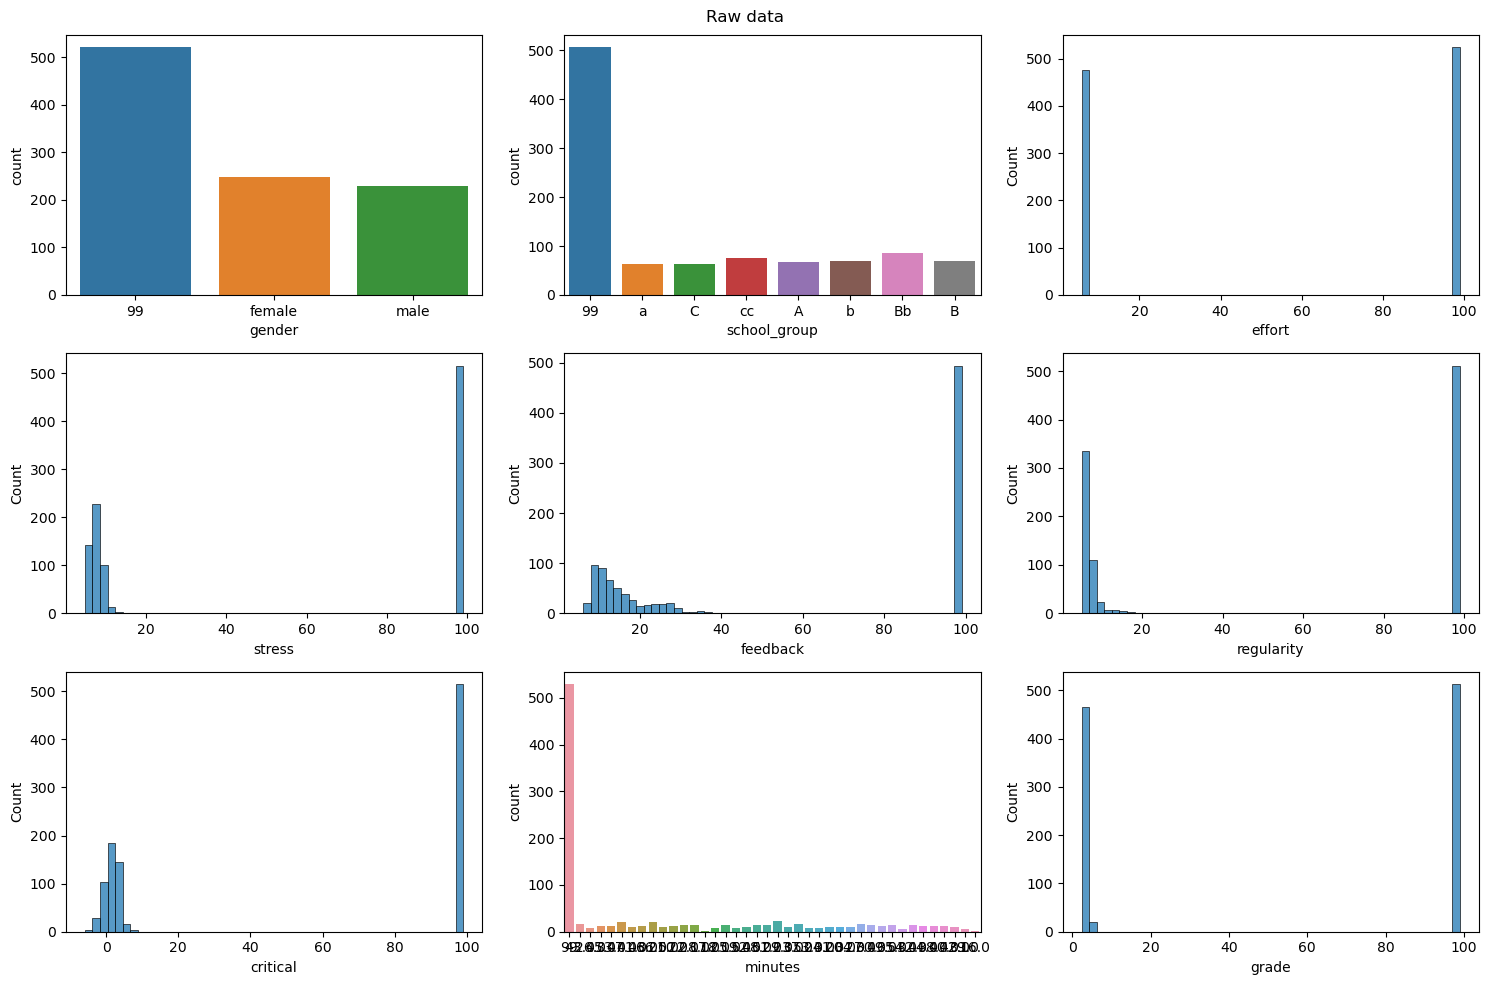

<module 'matplotlib.pyplot' from '/opt/homebrew/anaconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

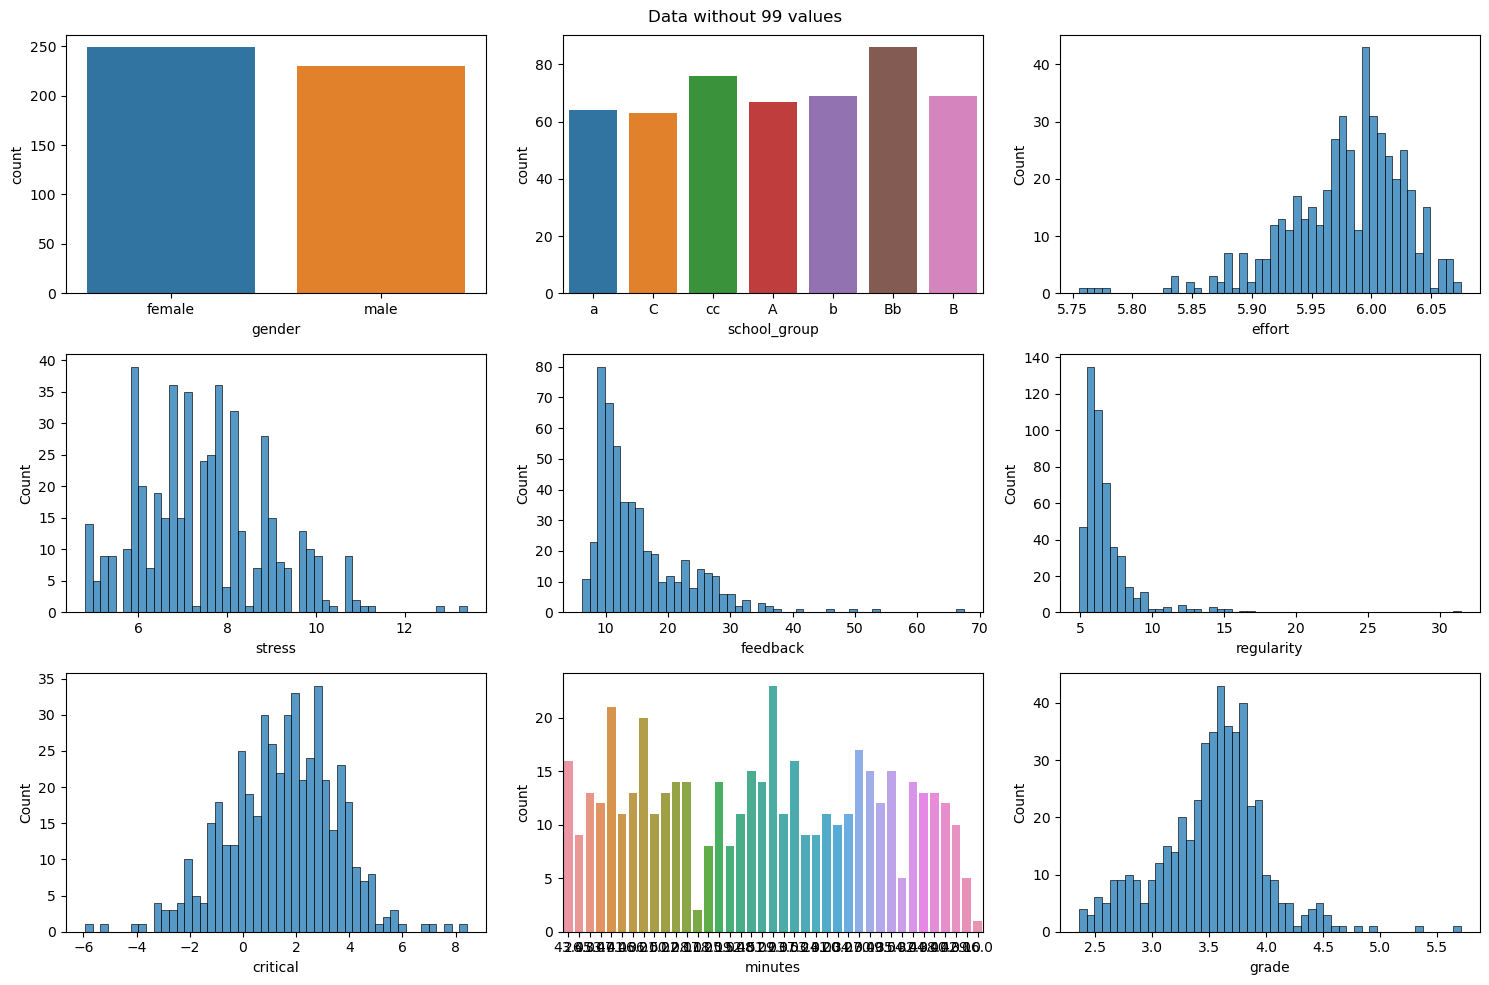

In [50]:
sample = df.sample(n=1000)
plot_features(sample)

### 1.4
Explain your observations. How are the features distributed (poisson, exponential, gaussian, etc)? Can you visually identify outliers? 

YOUR ANSWER HERE

<a id="section2"></a>
## **2 Data Cleaning** 
---

Using your findings from the previous section, carefully continue to explore the data set and do the following:

1. Create a function to handle the missing values
2. Justify your decisions to treat the missing values
3. Create a function to handle the inconsistent data
4. Justify your decisions to treat the inconsistent data


### 2.1
Create a function to handle the missing values

In [51]:
### 2.1
def handle_missing_values(df):
    """
    Identifies and removes all missing values

    Parameters
    ----------
    df : DataFrame
      Containing missing values

    Returns
    -------
    df : DataFrame
      Without missing values

    Hint:
    -----
    Try to understand the pattern in the missing values    
    """
    ### BEGIN SOLUTION 
    df = df.replace([99,'99'], np.nan)
    df = df.groupby(['student_id']).first()
    ### END SOLUTION
    return df

In [52]:
# TEST CELL, DONT MODIFY
assert len(handle_missing_values(df).columns) == 9


In [53]:
# TEST CELL, DONT MODIFY


In [54]:
df = handle_missing_values(df)
print("length of the dataframe:", len(df))
df.head()

length of the dataframe: 58329


,gender,school_group,effort,stress,feedback,regularity,critical,minutes,grade
student_id,,,,,,,,,
1.0,female,A,5.974496,9.688888,24.563935,6.639488,-1.795853,1 hr,3.41
2.0,male,a,5.982265,9.788799,18.722110,5.705770,0.952679,2hrs,2.66
3.0,male,cc,6.011487,7.847762,15.577682,5.821650,2.913822,2 hours,3.80
4.0,female,b,5.838975,6.155117,18.597183,5.137559,2.481461,30 min,3.53
5.0,female,cc,6.013486,6.848094,12.498195,6.447001,2.015520,45 min,3.88


In [55]:
# take a look at the new dataframe stats and compare it with the original
get_feature_stats(df)

,effort,stress,feedback,regularity,critical,grade,gender,school_group,minutes
mean,5.978440,7.572990,15.494115,6.859709,1.330283,3.537279,NaN,NaN,NaN
std,0.048722,1.552971,7.330119,2.169821,2.005023,0.456478,NaN,NaN,NaN
50%,5.985351,7.401787,12.843072,6.227957,1.372255,3.600000,NaN,NaN,NaN
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,7,49
top,NaN,NaN,NaN,NaN,NaN,NaN,female,b,30.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,29295,8414,1740
missing_values,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


### 2.2 
Justify your decisions to treat the missing values. Are there missing values? If so, how are the missing values encoded? Why are there missing values? Is there a pattern in the values missing?


YOUR ANSWER HERE

### 2.3 
Create a function to handle the inconsistent data

In [56]:
### 2.3
def handle_inconsistent_data(df):
    """
    Identifies features with inconsistent data types and transforms features
    to the correct data type (numerical, object). 

    Parameters
    ----------
    df : DataFrame
      Containing inconsistent data

    Returns
    -------
    df : DataFrame
       With consistent data. All columns must be either numerical or categorical

    Hint:
    -----
    Don't forget to convert the features into the correct data type 
    """
    ### BEGIN SOLUTION
    mapping_time = {'1 hr': 60, '2hrs': 120, '2 hours': 120, '30 min': 30,
                    '45 min': 45, '60 minutes': 60, '1.5 hours':90 }
    mapping_group = {'a':'A', 'b':'B', 'c':'C', 'aa': 'A', 'Bb':'B', 'cc':'C'}

    df = df.replace({'minutes': mapping_time, 'school_group': mapping_group})
    df['minutes'] = pd.to_numeric(df['minutes'])
    ### END SOLUTION
    return df

In [57]:
# TEST CELL, DONT MODIFY


In [58]:
# TEST CELL, DONT MODIFY


In [59]:
df = handle_inconsistent_data(df)
print(len(df))
print(df.head())
print(get_feature_stats(df))

58329
            gender school_group    effort    stress   feedback  regularity  \
student_id                                                                   
1.0         female            A  5.974496  9.688888  24.563935    6.639488   
2.0           male            A  5.982265  9.788799  18.722110    5.705770   
3.0           male            C  6.011487  7.847762  15.577682    5.821650   
4.0         female            B  5.838975  6.155117  18.597183    5.137559   
5.0         female            C  6.013486  6.848094  12.498195    6.447001   

            critical  minutes  grade  
student_id                            
1.0        -1.795853     60.0   3.41  
2.0         0.952679    120.0   2.66  
3.0         2.913822    120.0   3.80  
4.0         2.481461     30.0   3.53  
5.0         2.015520     45.0   3.88  
                  effort    stress   feedback  regularity  critical  \
mean            5.978440  7.572990  15.494115    6.859709  1.330283   
std             0.048722  1.5529

### 2.4 
Justify your decisions to treat the inconsistent data. Were there columns with inconsistent data types? How did you identify them? 
 

YOUR ANSWER HERE

<a id="section3"></a>
## **3 Visualization** 
---

After cleaning the data, we can try to understand or extract insights from it. To do so, in this last section, you will do the following:
1. Create a function to show the relationship between numerical features.
2. Interpret your findings. What is correlation useful for? What insights can you get from it? 
3. Select an appropriate type of graph to explore the relationship between grade, school group, and any other meaningful feature
4. Interpret your findings. What are some factors that seem to influence the grade of the students? Which features do not seem to affect the outcome?


### 3.1 
Create a function to show the linear correlation between features.

In [60]:
### 3.1
import seaborn as sns
def plot_correlation(df):
    """
    Builds upper triangular heatmap with pearson correlation between numerical variables

    Instructions
    ------------
    The plot must have:
    - An appropiate title
    - Only upper triangular elements
    - Annotated values of correlation coefficients rounded to three significant 
    figures
    - Negative correlation must be blue and possitive correlation red. 

    Parameters
    ----------
    df : DataFrame with data


    """
    ### BEGIN SOLUTION
    corr = np.round(df.corr(method='pearson'), 3)
    # what does np.tril do?
    # https://numpy.org/doc/stable/reference/generated/numpy.tril.html
    mask = np.tril(corr)
    print(mask)
    ax = plt.axes()
    # how do we mask the lower triangular part of the heatmap?
    # https://seaborn.pydata.org/generated/seaborn.heatmap.html
    heatmap = sns.heatmap(corr, annot=True, mask=mask, cmap='RdBu_r')
    ax.set_title('Correlation between variables')
    plt.show() 
    ### END SOLUTION


[[ 1.     0.     0.     0.     0.     0.     0.   ]
 [ 0.006  1.     0.     0.     0.     0.     0.   ]
 [ 0.005  0.025  1.     0.     0.     0.     0.   ]
 [-0.007  0.089 -0.003  1.     0.     0.     0.   ]
 [-0.008 -0.768 -0.019  0.038  1.     0.     0.   ]
 [-0.002 -0.003 -0.002  0.005 -0.001  1.     0.   ]
 [ 0.002 -0.375  0.008  0.529  0.413  0.004  1.   ]]


/var/folders/75/94jyvgc92_gcwmzgrg36xfd00000gn/T/ipykernel_37002/919839314.py:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = np.round(df.corr(method='pearson'), 3)


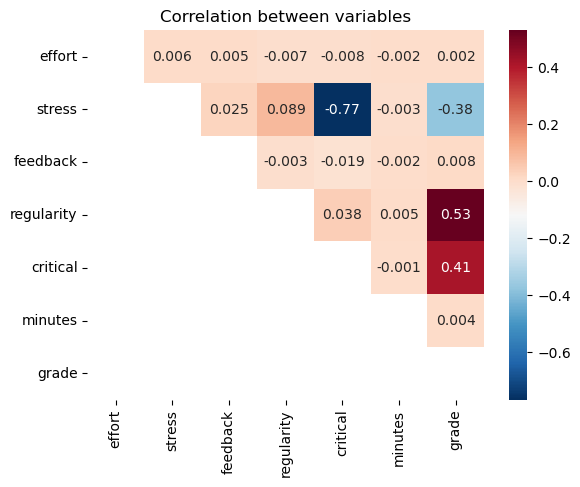

In [61]:
plot_correlation(df)

### 3.2
Interpret your findings. What is correlation useful for? What insights can you get from it? 


YOUR ANSWER HERE

### 3.3
Select an appropriate type of graph to explore the relationship between grade, school group, and any other meaningful feature.


In [62]:
### 3.3
def plot_grades(df):
    """
    Visualizes the relationship between grade,  school group and other meaningful
    feature

    Parameters
    ----------
    df : DataFrame with data

    """
    ### BEGIN SOLUTION
    sns.jointplot(data = df, y = 'grade', x = 'regularity', hue = 'school_group')
    ### END SOLUTION

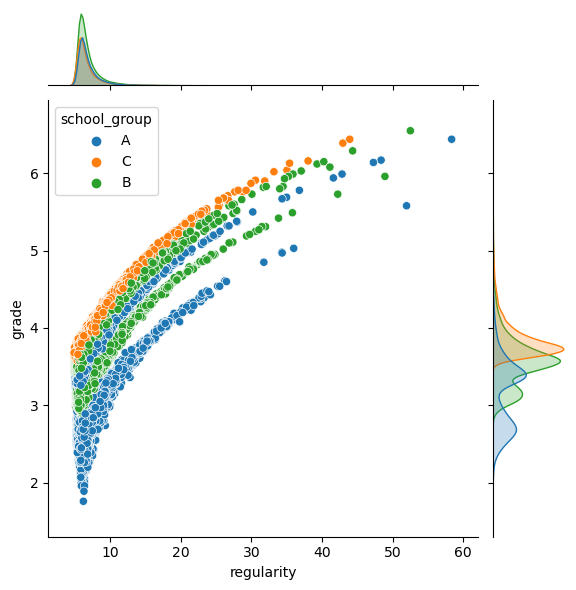

In [63]:
plot_grades(df)

### 3.4
Interpret your findings. What are some factors that seem to influence the grade of the students? Which features do not seem to affect the outcome?

YOUR ANSWER HERE